In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop(['CustomerID','Genre','Age'],axis = 1, inplace = True)

In [7]:
df.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
X = np.array(df)

In [9]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Generating centroids of each clusters

In [34]:
import random
random.seed(42)
initial_centroids = random.sample(range(0,len(df)),5)

In [35]:
initial_centroids

[163, 28, 6, 189, 70]

In [36]:
centroids = []
for i in initial_centroids:
    centroids.append(df.iloc[i])

In [37]:
centroids

[Annual Income (k$)        81
 Spending Score (1-100)    93
 Name: 163, dtype: int64,
 Annual Income (k$)        29
 Spending Score (1-100)    31
 Name: 28, dtype: int64,
 Annual Income (k$)        18
 Spending Score (1-100)     6
 Name: 6, dtype: int64,
 Annual Income (k$)        103
 Spending Score (1-100)     85
 Name: 189, dtype: int64,
 Annual Income (k$)        49
 Spending Score (1-100)    55
 Name: 70, dtype: int64]

In [38]:
centroids = np.array(centroids)

In [39]:
centroids.shape

(5, 2)

calculating the distance between the points

In [40]:
def distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [41]:
def finding_closest_centroids(ic, X):
    assigned_centroid = []
    for i in X:
        distances = []
        for j in ic:
            distances.append(distance(i, j))
        assigned_centroid.append(np.argmin(distances))
    return assigned_centroid

In [42]:
get_centroids = finding_closest_centroids(centroids, X)

In [43]:
get_centroids

[1,
 4,
 2,
 4,
 1,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 2,
 4,
 2,
 4,
 1,
 4,
 1,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 4,
 4,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 0,
 1,
 0,
 1,
 0,
 4,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 1,
 0,
 1,
 0,
 4,
 0,
 1,
 0,
 4,
 0,
 4,
 0,
 4,
 3,
 4,
 3,
 4,
 0,
 4,
 0,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [44]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

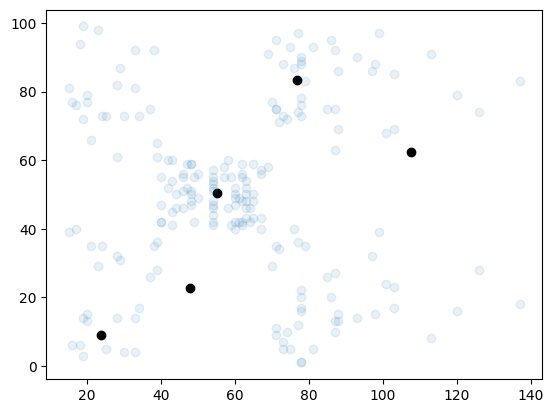

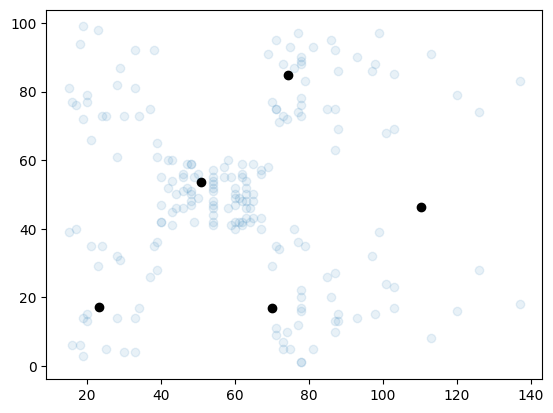

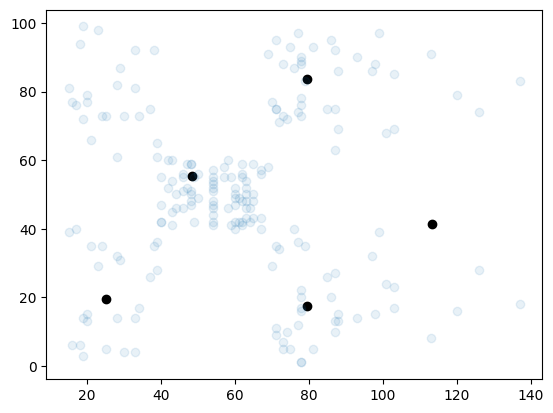

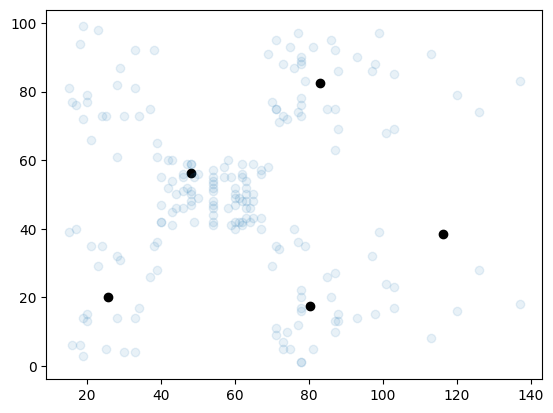

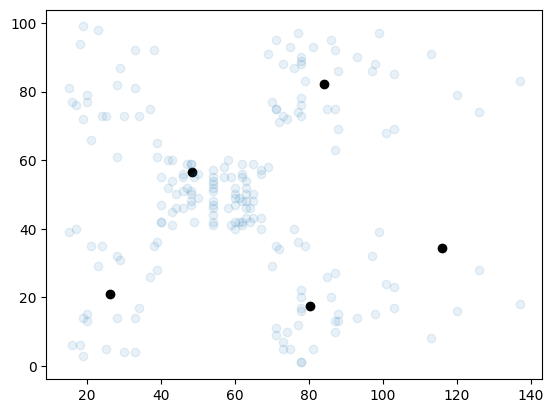

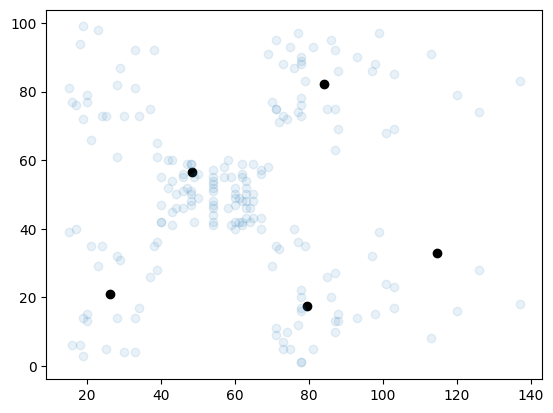

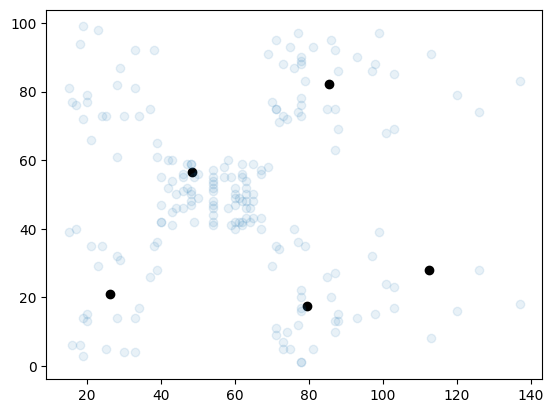

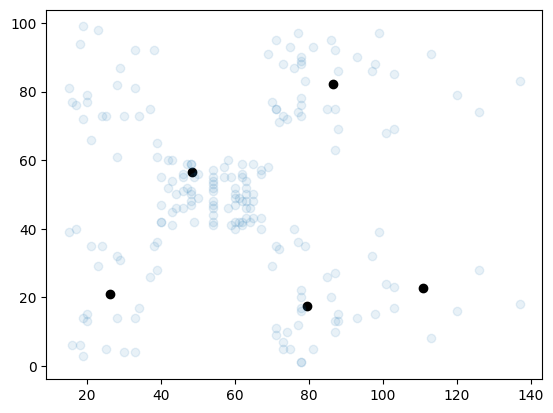

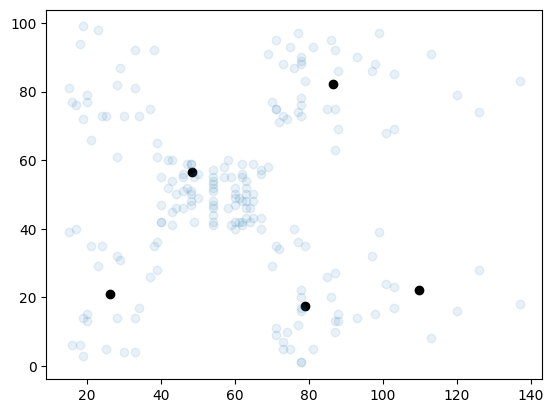

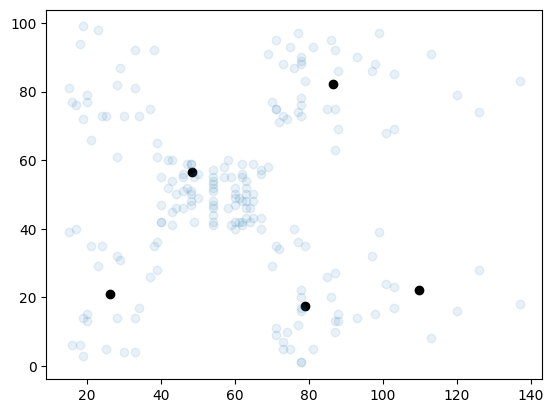

In [45]:
for i in range(10):
    get_centroids = finding_closest_centroids(centroids, X)
    centroids = calc_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()